##  Data Science & Business Analytics Task - 2
-- Given by Spark Foundation in Graduate Rotational Internship Program 
##### Author : Soumyadeep Sengupta


In this task From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

- Language used: Python
- Clustering
- K-Means Clustering


This is a simple clustering task as it involves just six variables. Data can be found at https://bit.ly/3kXTdox . i have downloaded the CSV file and import the data


`video solution : https://youtu.be/wze4QgaSa-A ` 

`Linked in Solution : https://github.com/soumyadeep28/Data-Science/tree/master/Internship_Mock_Projects/Spark_foundation `

##### Data Import and Pre-processing

In [128]:
# IMPORT  LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for filtering the warning
import warnings
warnings.filterwarnings('ignore')

# Lib for ML model
import sklearn
from sklearn.cluster import KMeans


In [129]:
# READING DATA FROM REMOTE LINK

data = pd.read_csv('Iris.csv')

print("Data imported successfully")


data.head()

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
# DATAFRAME INFORMATION
print(data.info())
print('data frame describe: \n',data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
data frame describe: 
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.30000

In [131]:

#dropping the id column as it is not required
data.drop('Id', axis =1, inplace = True)

In [132]:
# CHECK MISSING DATA
data.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

we can see there are no null values in the data set so we can proceed further

In [133]:
data.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

we can see there are three catagory in this data set

##### Data Visualisation :


Text(0.5, 1.0, 'scatter')

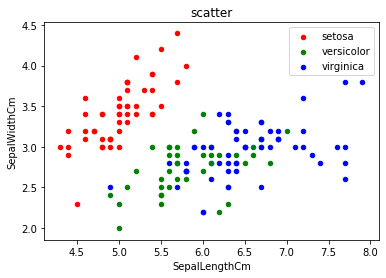

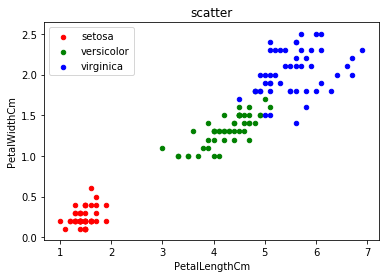

In [134]:

ax = data[data.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

ax = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                    color='red', label='setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='green', label='versicolor', ax=ax)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

##### Finding the optimum number of clusters :

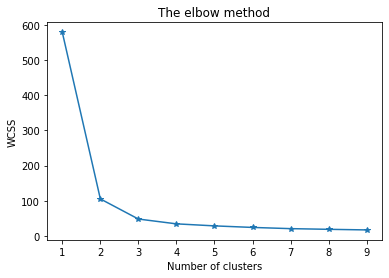

In [136]:
x = data.iloc[:, [ 1, 2, 3 ]].values

#An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS)
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 10), wcss,marker='*')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In the Elbow method the number of Cluster prediction is true. So this Technique indiactes a number of `Clusters=3` <br/>
The name 'elbow method' signifies that the optimum number of clusters can be found where the elbow occurs. Here, in our graph we can see that the elbow occurs at around 3. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

##### Applying Kmeans Clustering on data

In [137]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [138]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [139]:
# CLUSTER CENTRE

centers = kmeans.cluster_centers_
print(centers)

[[3.00425532 5.6106383  2.04255319]
 [3.418      1.464      0.244     ]
 [2.75471698 4.28113208 1.3509434 ]]


##### Visulatisation of the Cluster :

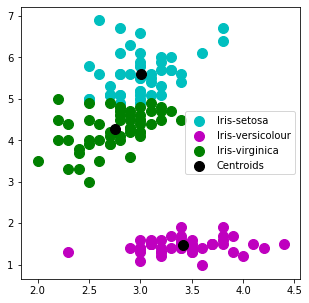

In [140]:
plt.figure(figsize=(5,5))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'c', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'm', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'g', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'k', label = 'Centroids')

plt.legend()
plt.show()

##### Prediction of the iris flower species

In [145]:
x = data.iloc[:,1:5].values


In [144]:
y = data.iloc[:,-1].values


Text(0.5, 1.0, 'Predicted')

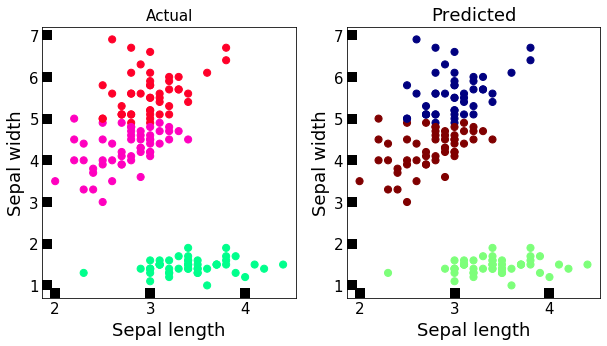

In [143]:
# Compare our original data versus our clustered results 

new_labels = kmeans.labels_

# Plot the identified clusters and compare with the answers

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].scatter(x[:, 0], x[:, 1], c=y_kmeans, cmap='gist_rainbow', s=50)
axes[1].scatter(x[:, 0], x[:, 1], c=new_labels, cmap='jet', s=50)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=10, colors='k', labelsize=15)
axes[1].tick_params(direction='in', length=10, width=10, colors='k', labelsize=15)
axes[0].set_title('Actual', fontsize=15)
axes[1].set_title('Predicted', fontsize=18)


Using K-Means with the Elbow method did an amazing job at predicting the number of true Clusters which is 3. The above visualization is the clustered graph.also we showed how its from actual and predicted value